<a href="https://colab.research.google.com/github/Ilmaj17/Cereal-Rating-Prediction/blob/main/Cereal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Understanding the data

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Data Sets/cereal.csv')

In [ ]:
df.shape

(77, 16)

###There are 77 datas and 16 data fields

In [ ]:
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


###Check the columns in the data set

In [ ]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

###Identifying for categorical and numerical data

In [ ]:
df.dtypes

name         object
mfr          object
type         object
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
dtype: object

In [ ]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


#Data Cleaning

In [ ]:
categorical_data = df.dtypes[df.dtypes == 'object'].index
categorical_data

Index(['name', 'mfr', 'type'], dtype='object')

###Now we see that there are three categorical datas. So they have to be converted to numerical values. First let's try checking the number of unique values in each vector.

In [ ]:
for c in categorical_data:
  print(c, " : ", df[c].nunique())

name  :  77
mfr  :  7
type  :  2


###Converting the categorical values in 'type' vector of the DataFrame into numerical values using Pandas

In [ ]:
type_unique_values = df['type'].unique()
type_unique_values

array(['C', 'H'], dtype=object)

In [ ]:
type_frame = pd.get_dummies(df.type)
type_frame = type_frame.astype(int)
df = df.drop(columns=['type'])
df = pd.concat([df, type_frame], axis = 1)
df.head()

,name,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,C,H
0,100% Bran,N,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1,0
1,100% Natural Bran,Q,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,1,0
2,All-Bran,K,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,1,0
3,All-Bran with Extra Fiber,K,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,1,0
4,Almond Delight,R,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,1,0


###We have 2 different categorical values in type and 7 different values in mfr. 77 unique values in name, so it don't seem useful in using name for prediction.

###Converting the categorical values in 'mfr' vector of the DataFrame into numerical values

In [ ]:
mfr_unique_values = df['mfr'].unique()
mfr_unique_values

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [ ]:
print(df.mfr.value_counts())

mfr
K    23
G    22
P     9
Q     8
R     8
N     6
A     1
Name: count, dtype: int64


In [ ]:
labels = []
for i in range(7):
  labels.append(i)
print(labels)

[0, 1, 2, 3, 4, 5, 6]


In [ ]:
mfr_num = pd.Series(mfr_unique_values, index=labels)
for i in range(7):
  print(mfr_num[i])

N
Q
K
R
G
P
A


In [ ]:
mfr_len = len(df['mfr'])
for i in range(mfr_len):
  for j in range(7):
    if(df.iloc[i].mfr == mfr_num[j]):
      df.at[i, 'mfr'] = j
df['mfr']

0     0
1     1
2     2
3     2
4     3
     ..
72    4
73    4
74    3
75    4
76    4
Name: mfr, Length: 77, dtype: object

In [ ]:
df['mfr'] = df['mfr'].astype(int)
df.dtypes

name         object
mfr           int64
calories      int64
protein       int64
fat           int64
sodium        int64
fiber       float64
carbo       float64
sugars        int64
potass        int64
vitamins      int64
shelf         int64
weight      float64
cups        float64
rating      float64
C             int64
H             int64
dtype: object

In [ ]:
print(df.mfr.value_counts())

mfr
2    23
4    22
5     9
1     8
3     8
0     6
6     1
Name: count, dtype: int64


###Dropping out 'name' vector from the dataframe seems to be useful as it dosn't seem to benefit our machine learning model as it all has unique values.

In [ ]:
df = df.drop(columns='name')
df

,mfr,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,C,H
0,0,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,1,0
1,1,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,1,0
2,2,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,1,0
3,2,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,1,0
4,3,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,4,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,1,0
73,4,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,1,0
74,3,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,1,0
75,4,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,1,0


###Identifying for any missing/null values

In [ ]:
df.isna().sum()

mfr         0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
C           0
H           0
dtype: int64

###So it's great. We son't have to handle with any missing values.

###Let's check if we have any duplicate columns

In [ ]:
count = sum(df.duplicated())
count

0

###Feature Understanding

We will be using kernel density plots (kde) for each feature

In [ ]:
df.columns

Index(['mfr', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'C', 'H'],
      dtype='object')

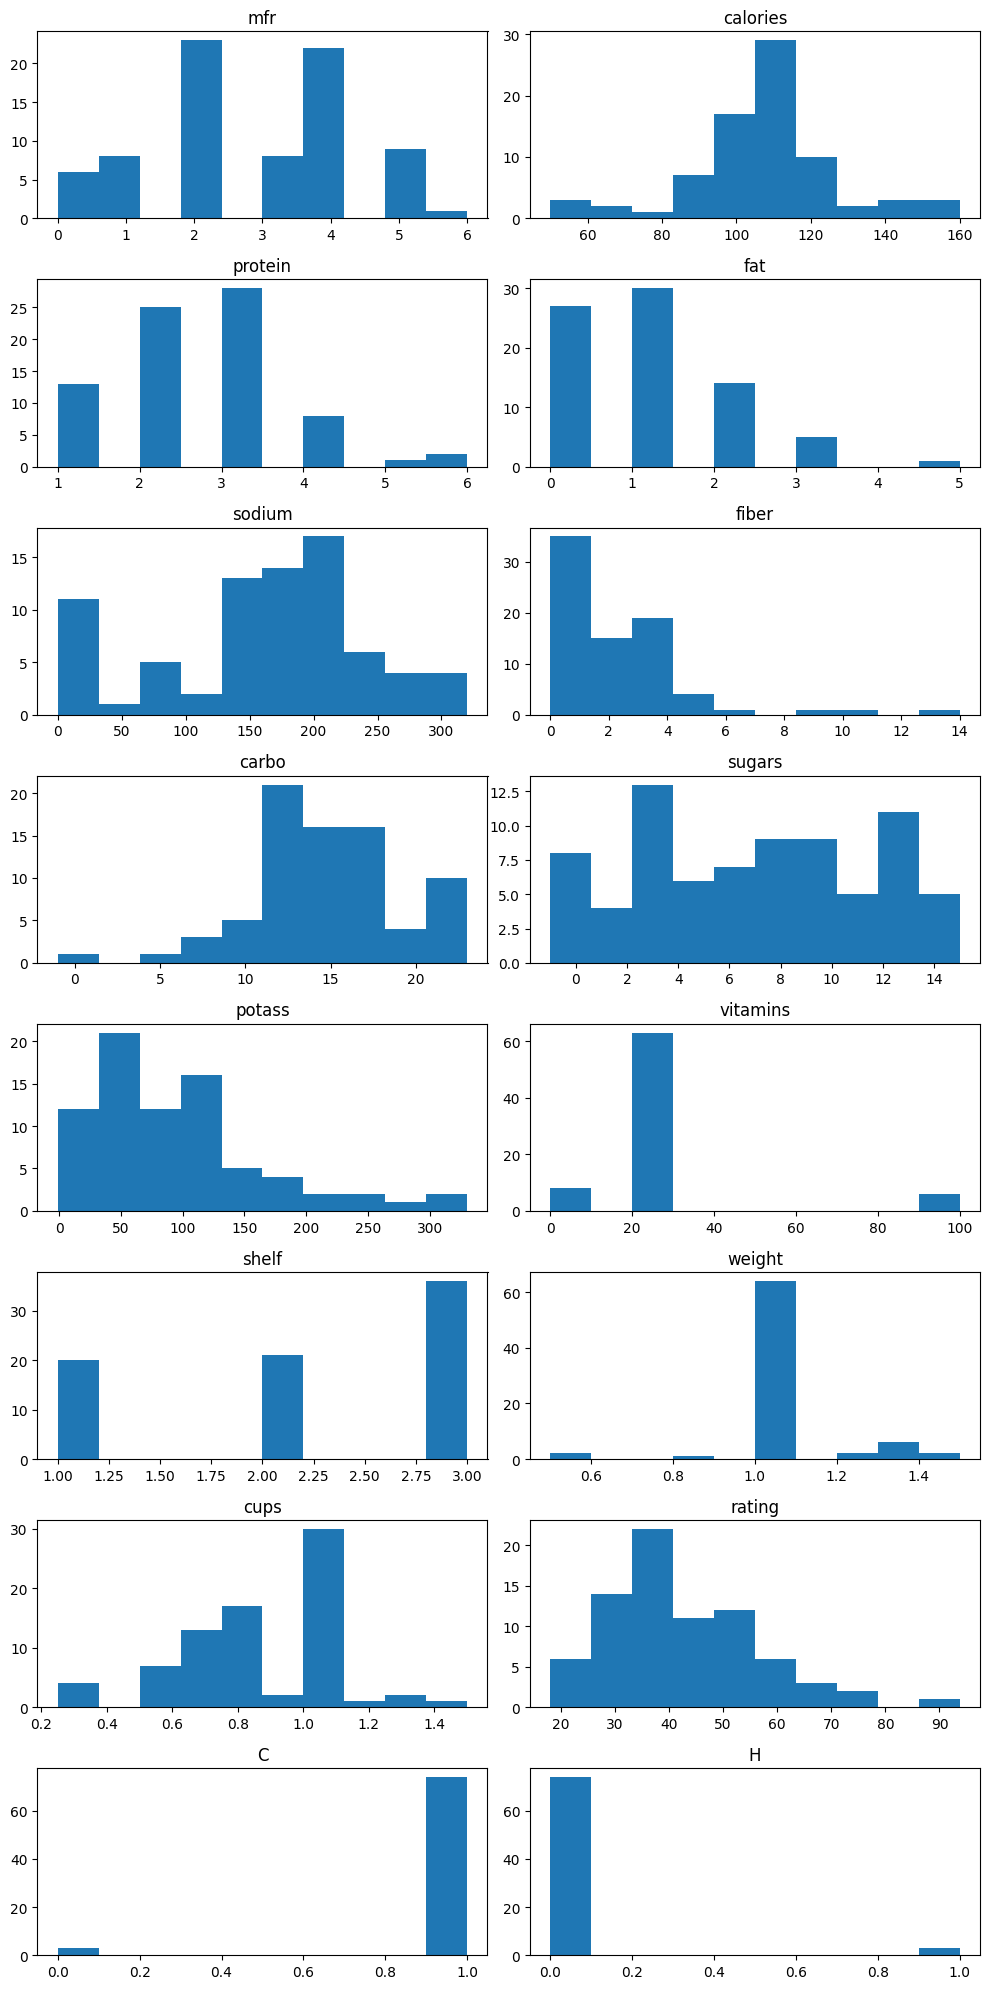

In [ ]:
import math
col = ['mfr', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'rating',
       'C', 'H']
n = math.ceil(len(col)/2)
fig, ax = plt.subplots(n, 2, figsize=(10, 20))
i = 0
j = 0
for c in col:
  ax[i, j].hist(df[c])
  ax[i, j].set_title(c)
  j = 1 if j==0 else 0
  if (j==0):
    i = i+1
plt.tight_layout()
plt.show()

###Potassium, cups, rating, potass, carbo, sugars, sodium,

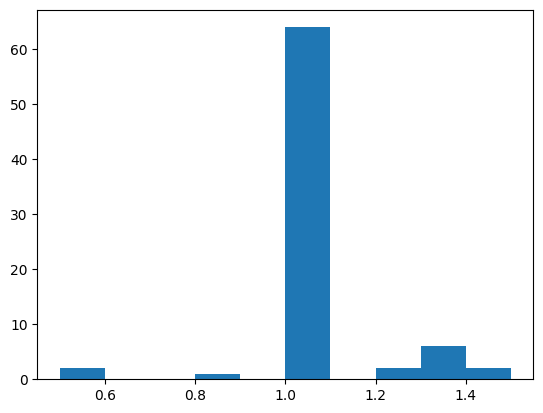

In [ ]:
plt.hist(df['weight'])
plt.show()

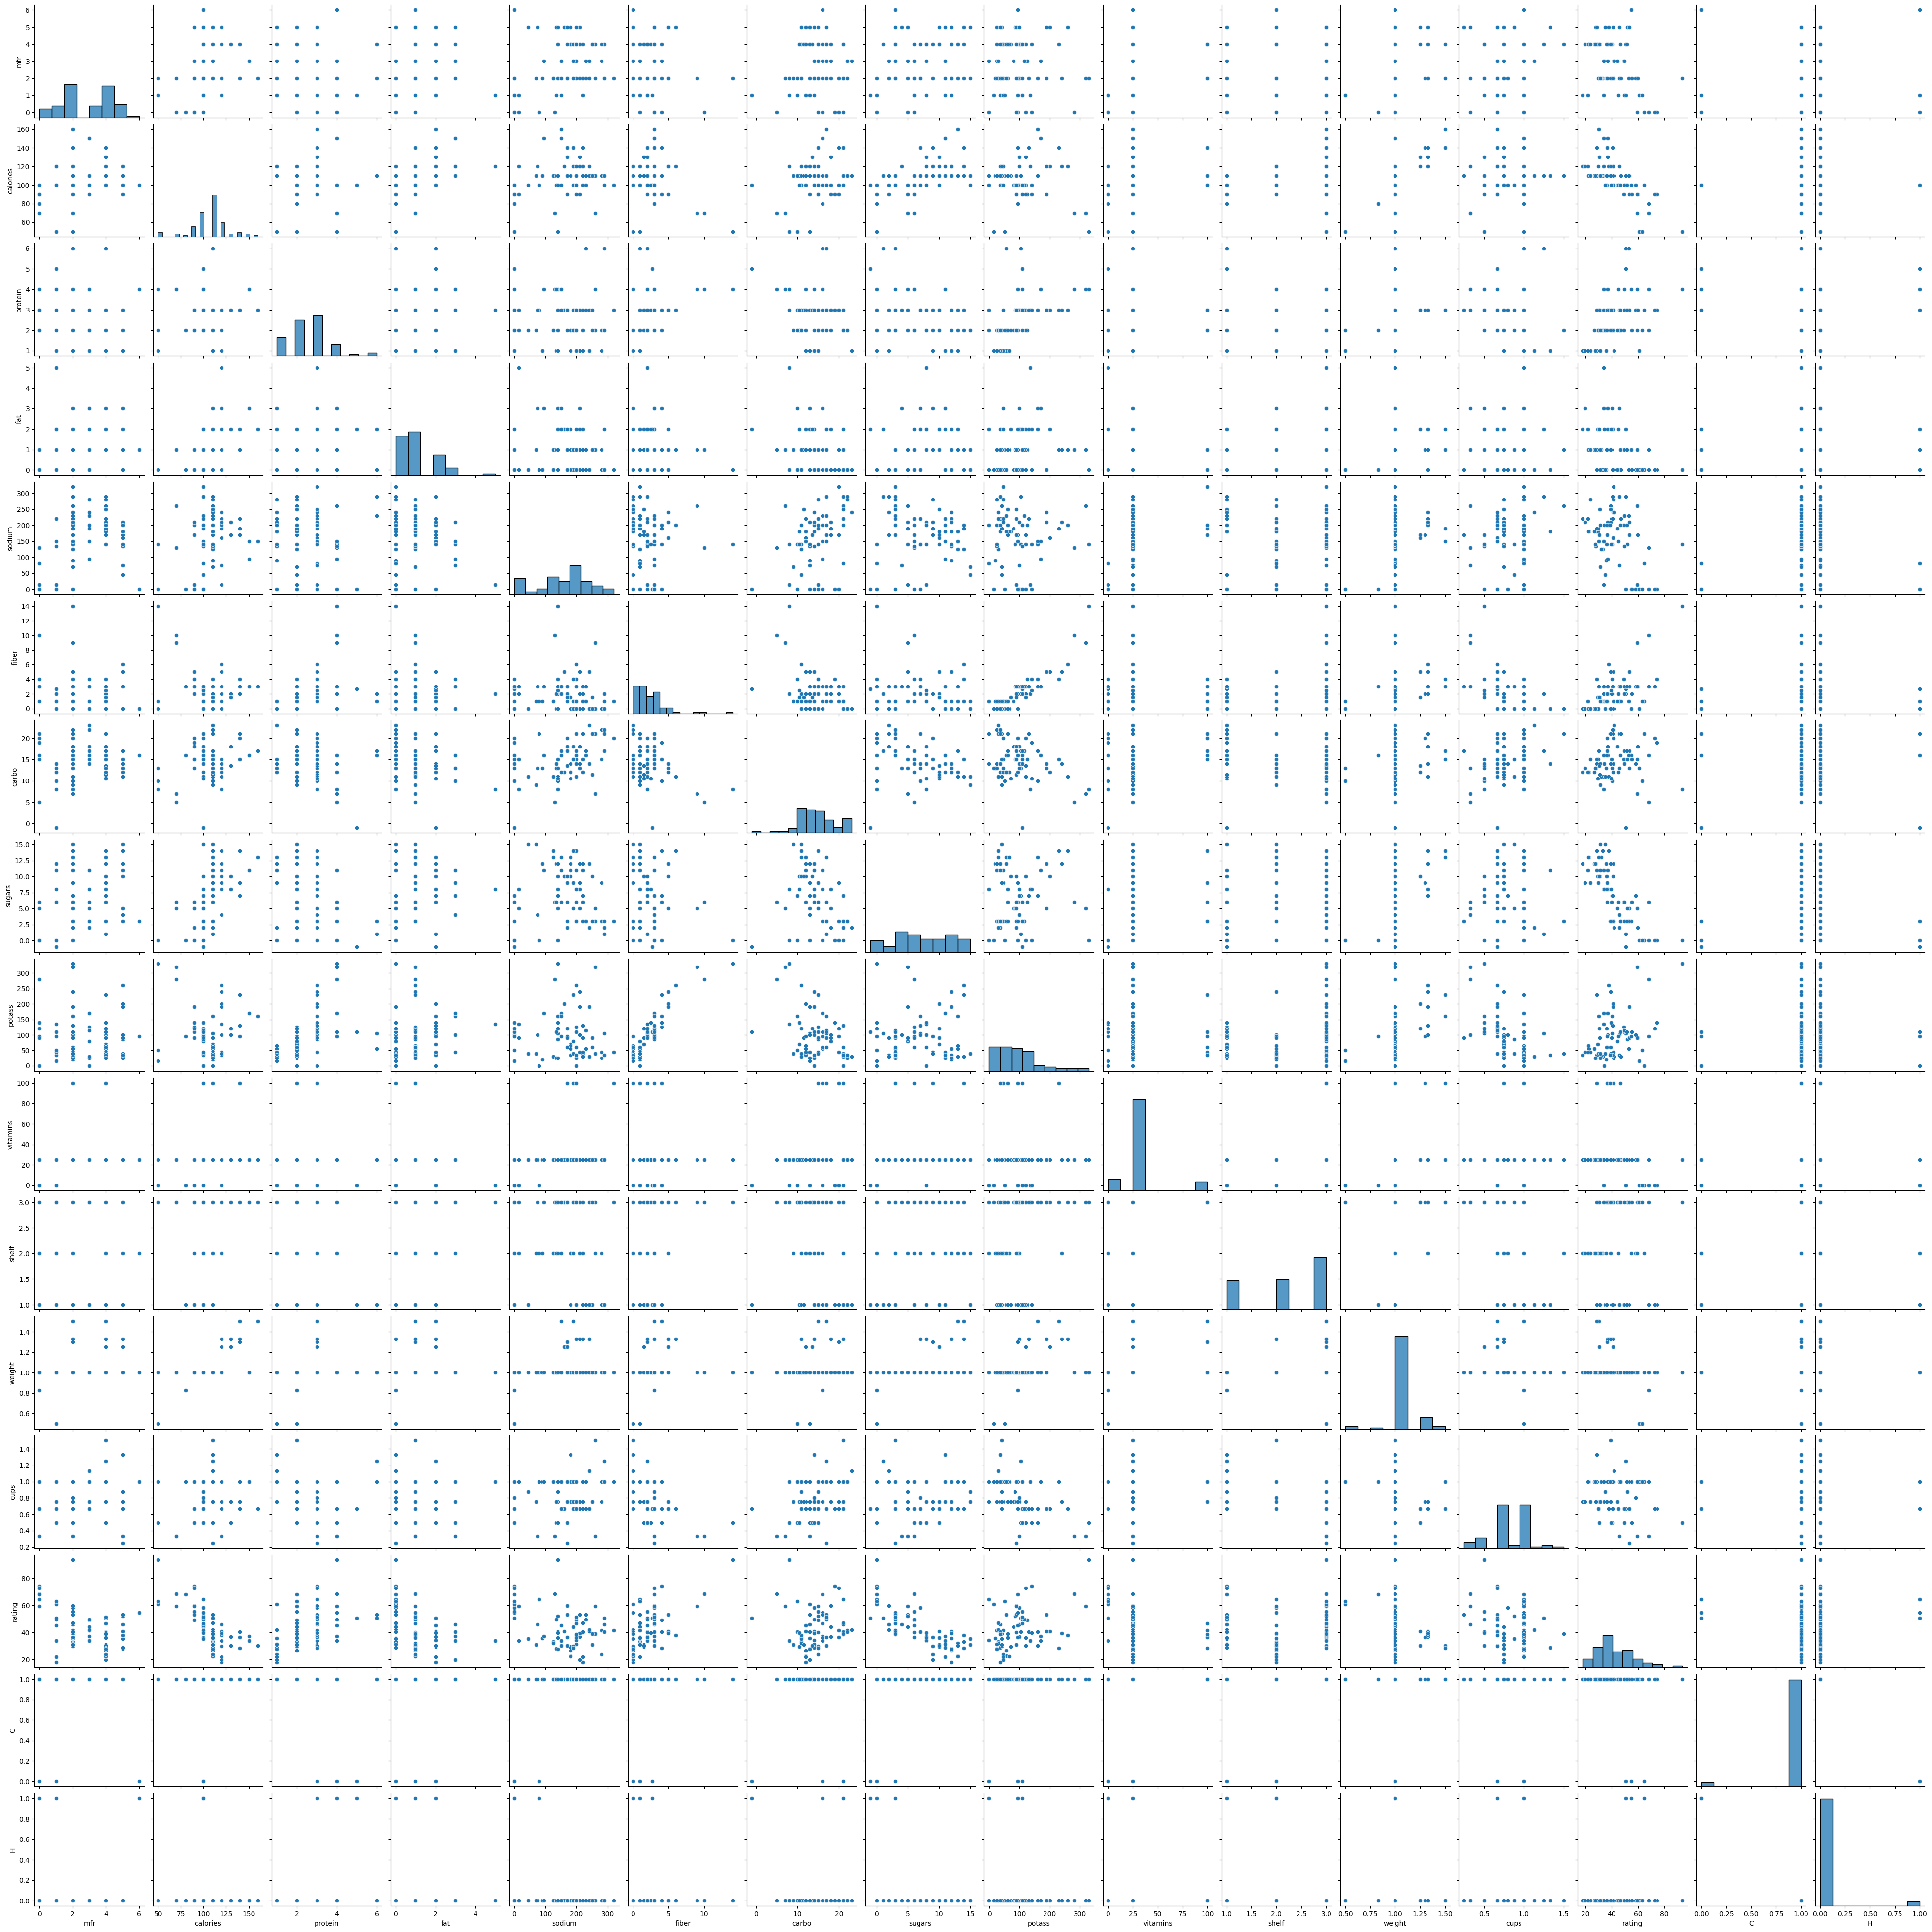

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot using seaborn
sns.pairplot(df[col])
plt.show()

###Feature Relationship

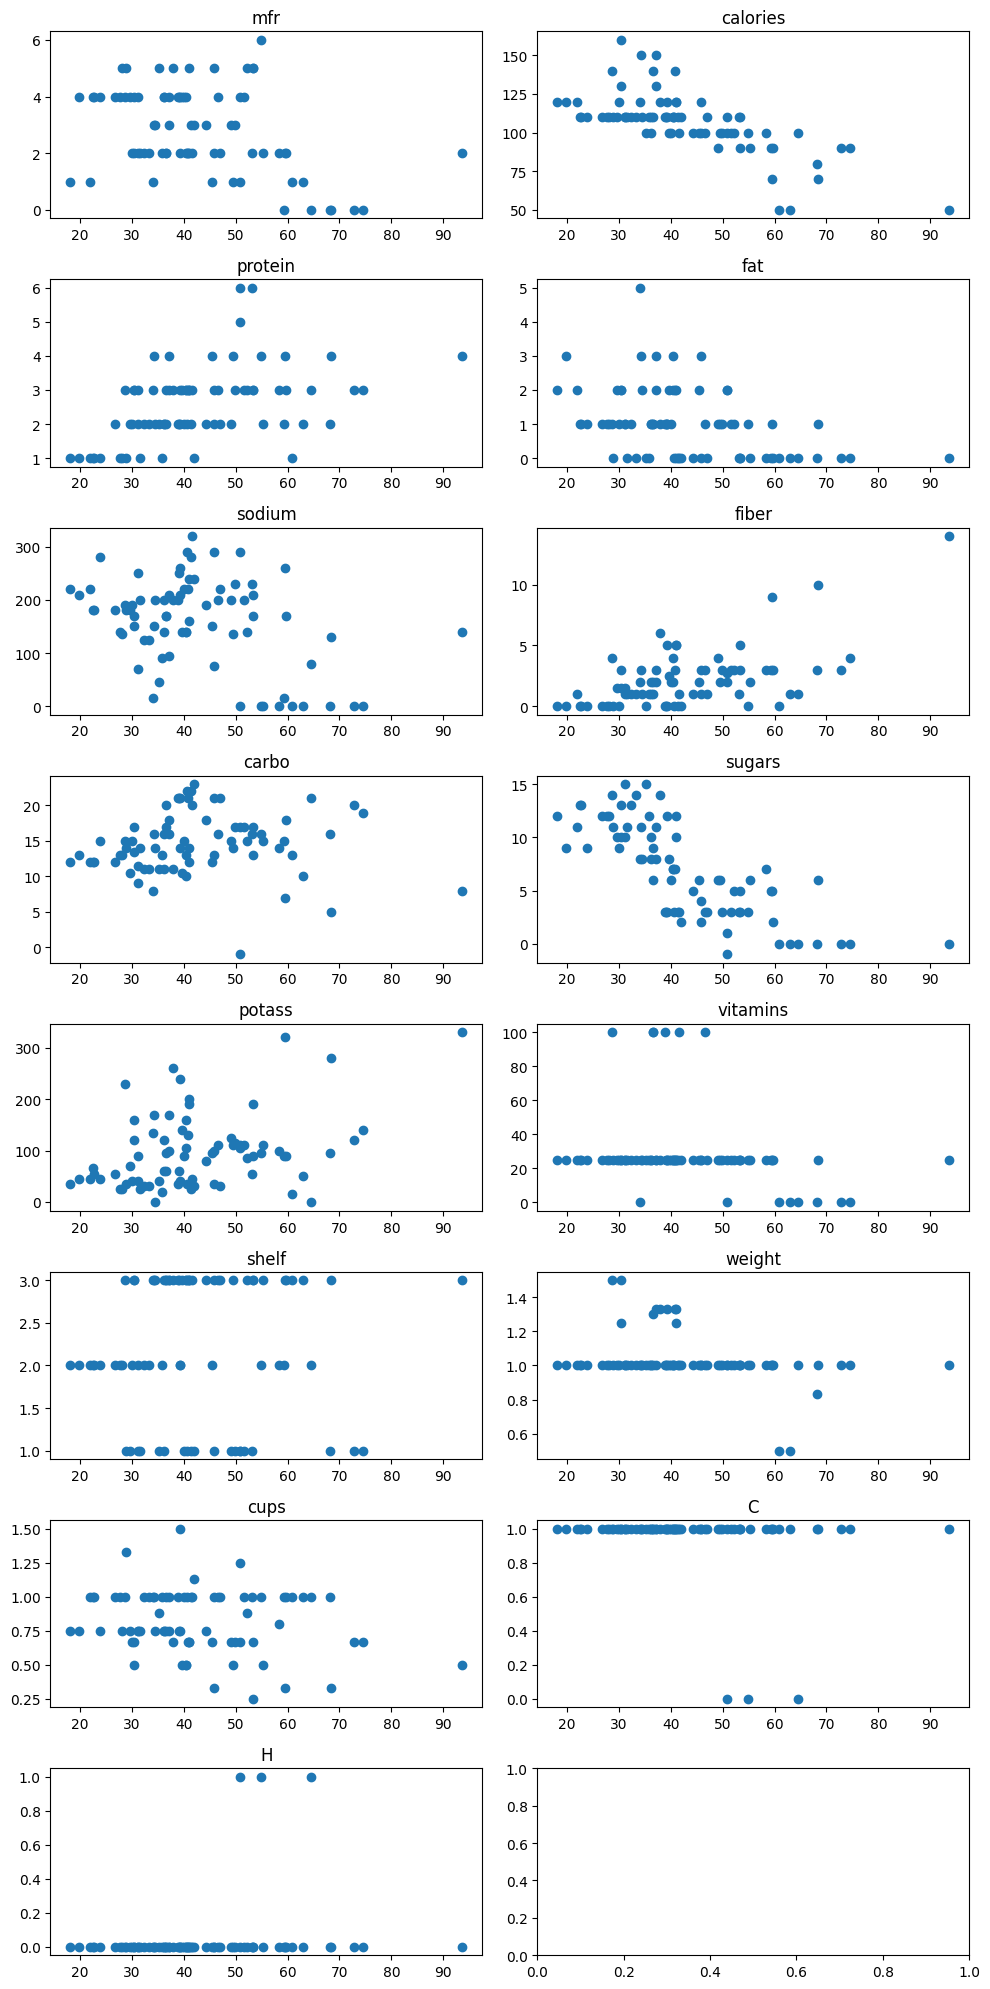

In [ ]:
newcol = ['mfr', 'calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo',
       'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups', 'C', 'H']
n = math.ceil(len(newcol)/2)
fig, ax = plt.subplots(n, 2, figsize=(10, 20))
i = 0
j = 0
for c in newcol:
  ax[i, j].scatter(df['rating'], df[c])
  ax[i, j].set_title(c)
  j = 1 if j==0 else 0
  if (j==0):
    i = i+1
plt.tight_layout()
plt.show()


###For better understanding we can deal with heatmaps

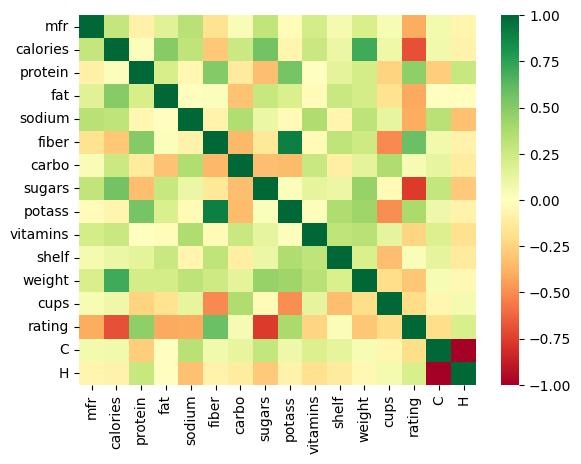

In [ ]:
sns.heatmap(df.corr(),cmap='RdYlGn')
plt.show()

In [ ]:
for c in newcol:
  corre = df['rating'].corr(df[c])
  print("Correlation between rating and ", c, " is ", corre)

Correlation between rating and  mfr  is  -0.4040751934691878
Correlation between rating and  calories  is  -0.6893760311652585
Correlation between rating and  protein  is  0.4706184645492595
Correlation between rating and  fat  is  -0.40928366014781
Correlation between rating and  sodium  is  -0.40129520449484846
Correlation between rating and  fiber  is  0.5841604199515837
Correlation between rating and  carbo  is  0.052054661233764614
Correlation between rating and  sugars  is  -0.7596746584301077
Correlation between rating and  potass  is  0.3801653686941008
Correlation between rating and  vitamins  is  -0.24054361076908157
Correlation between rating and  shelf  is  0.02515881567911694
Correlation between rating and  weight  is  -0.298123984977947
Correlation between rating and  cups  is  -0.20316006300817865
Correlation between rating and  C  is  -0.20302370742156062
Correlation between rating and  H  is  0.20302370742156062


###We can consider only the positive correlations that are greater than 0.1.
So We could choose the features: protein, fiber, potass, H

In [ ]:
df = df.drop(['mfr', 'calories', 'fat', 'sodium', 'carbo','sugars', 'vitamins', 'shelf', 'weight', 'cups', 'C'], axis =1)

In [ ]:
df.columns

Index(['protein', 'fiber', 'potass', 'rating', 'H'], dtype='object')

###Now Our Data Preprocessing is completed. The dataset is ready for model training

###We can start by a supervised learning method like Linear Regression

###Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X = df[[ 'protein', 'fiber', 'potass',  'H']]
y = df['rating']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

In [ ]:
X_test.head()

,protein,fiber,potass,H
29,1,0.0,25,0
27,3,5.0,200,0
54,1,0.0,15,0
50,3,3.0,90,0
71,3,3.0,110,0


In [ ]:
y_test.head()

29    28.025765
27    40.917047
54    60.756112
50    59.642837
71    46.658844
Name: rating, dtype: float64

In [ ]:
X_train.head()

,protein,fiber,potass,H
30,2,0.0,40,0
58,3,5.0,240,0
21,2,1.0,30,0
10,1,0.0,35,0
41,4,2.0,95,0


In [ ]:
y_train.head()

30    35.252444
58    39.259197
21    46.895644
10    18.042851
41    45.328074
Name: rating, dtype: float64

##Linear Regression



In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_predict = lr.predict(X_test)
y_predict

array([31.0486998 , 47.18857498, 32.61817095, 50.43261783, 47.29367554,
       33.70431381, 36.8432561 , 36.35992781, 35.47009168, 43.47509824,
       44.78181798, 45.72420439, 41.06834124, 39.91751303, 71.64330514,
       46.1549824 ])

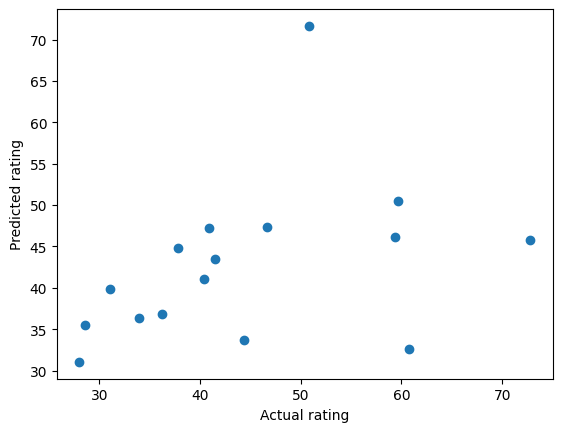

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.show()

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

-0.014179455335897595

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
y_predict = rfr.predict(X_test)
y_predict

array([30.57888626, 46.21096576, 32.66994545, 53.35146508, 51.36858247,
       36.12002139, 37.65790681, 39.14084504, 42.9513368 , 41.613279  ,
       44.03771582, 45.93726305, 41.90092104, 39.41930203, 53.12688822,
       57.24785021])

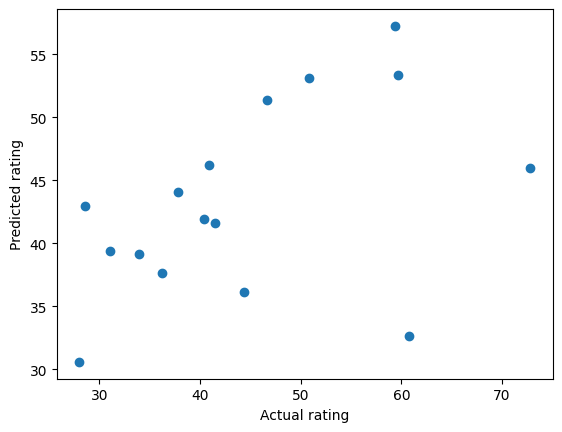

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.show()

In [ ]:
r2_score(y_test, y_predict)

0.19714426711868138

##Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
y_predict = dtr.predict(X_test)
y_predict

array([27.753301 , 47.1646525, 35.782791 , 53.371007 , 51.592193 ,
       29.509541 , 36.523683 , 39.7034   , 39.259197 , 31.230054 ,
       39.259197 , 49.787445 , 37.038562 , 29.509541 , 64.533816 ,
       53.371007 ])

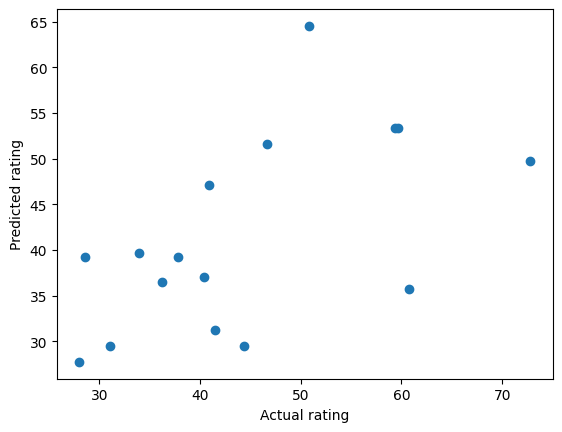

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.show()

In [ ]:
r2_score(y_test, y_predict)

0.22161685771363693

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
y_predict = knr.predict(X_test)
y_predict

array([35.6832034, 40.973026 , 35.6832034, 50.0522532, 51.3979306,
       42.3069844, 29.4994662, 46.887953 , 47.226248 , 31.9469214,
       52.283396 , 43.425386 , 50.1987436, 45.470691 , 51.3979306,
       50.0522532])

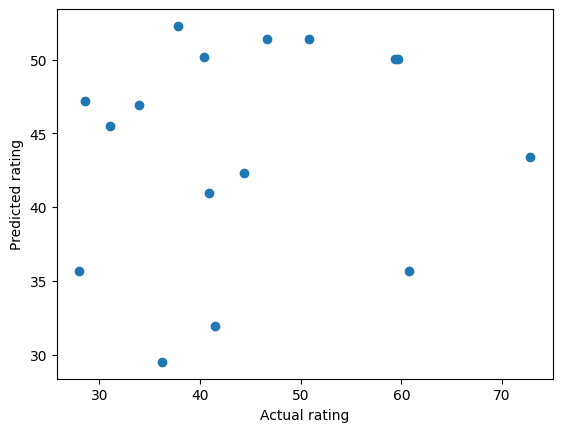

In [ ]:
plt.scatter(y_test, y_predict)
plt.xlabel("Actual rating")
plt.ylabel("Predicted rating")
plt.show()

In [ ]:
r2_score(y_test, y_predict)

-0.15427668940104455

###Out of the models trained above Random Forest seems to be a good model. But, the accuracy is very low.